# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
 
print data    
print prices
print features

# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
5    6.430   5.21     18.7  602700.0
6    6.012  12.43     15.2  480900.0
7    6.172  19.15     15.2  569100.0
8    5.631  29.93     15.2  346500.0
9    6.004  17.10     15.2  396900.0
10   6.377  20.45     15.2  315000.0
11   6.009  13.27     15.2  396900.0
12   5.889  15.71     15.2  455700.0
13   5.949   8.26     21.0  428400.0
14   6.096  10.26     21.0  382200.0
15   5.834   8.47     21.0  417900.0
16   5.935   6.58     21.0  485100.0
17   5.990  14.67     21.0  367500.0
18   5.456  11.69     21.0  424200.0
19   5.727  11.28     21.0  382200.0
20   5.570  21.02     21.0  285600.0
21   5.965  13.83     21.0  411600.0
22   6.142  18.72     21.0  319200.0
23   5.813  19.88     21.0  304500.0
24   5.924  16.30     21.0  327600.0
25   5.599  16.51     21.0  291900.0
2

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [15]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices) 

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)


Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


(array([  1.,   1.,   4.,  10.,  10.,  17.,  24.,  25.,  35.,  35.,  40.,
         41.,  49.,  45.,  56.,  30.,  29.,  16.,  15.,   6.]),
 array([ 0.68309684,  0.83078182,  0.9784668 ,  1.12615177,  1.27383675,
         1.42152173,  1.5692067 ,  1.71689168,  1.86457666,  2.01226163,
         2.15994661,  2.30763159,  2.45531656,  2.60300154,  2.75068652,
         2.89837149,  3.04605647,  3.19374144,  3.34142642,  3.4891114 ,
         3.63679637]),
 <a list of 20 Patch objects>)

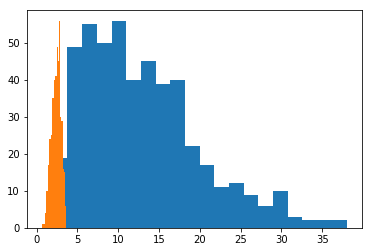

In [21]:
# Histogram representation of data to see the general distribution..

# First we plot 'LSTAT' 
plt.hist(data.LSTAT, bins = 20)

# And here we use the log function to transform our data
plt.hist(np.log(data.LSTAT), bins = 20)

(array([   3.,   10.,    0.,    0.,    0.,   32.,   21.,    3.,   12.,
          22.,   13.,   25.,   38.,   45.,   35.,   27.,  147.,    0.,
          54.,    2.]),
 array([ 2.53369681,  2.5615641 ,  2.58943138,  2.61729866,  2.64516594,
         2.67303322,  2.70090051,  2.72876779,  2.75663507,  2.78450235,
         2.81236963,  2.84023692,  2.8681042 ,  2.89597148,  2.92383876,
         2.95170604,  2.97957333,  3.00744061,  3.03530789,  3.06317517,
         3.09104245]),
 <a list of 20 Patch objects>)

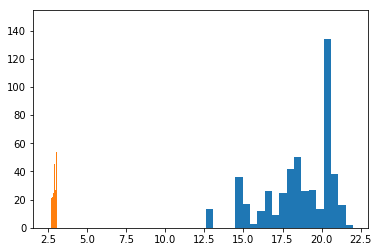

In [22]:
#plot 'PTRATIO'
plt.hist(data.PTRATIO, bins = 20)

#plot the log function of it
plt.hist(np.log(data.PTRATIO), bins = 20)


(array([   1.,    1.,    0.,    2.,    1.,    1.,    2.,    8.,    5.,
          20.,   33.,   79.,  104.,   92.,   55.,   39.,   24.,   11.,
           5.,    6.]),
 array([ 1.2700414 ,  1.31293901,  1.35583662,  1.39873423,  1.44163184,
         1.48452945,  1.52742706,  1.57032467,  1.61322228,  1.65611988,
         1.69901749,  1.7419151 ,  1.78481271,  1.82771032,  1.87060793,
         1.91350554,  1.95640315,  1.99930076,  2.04219836,  2.08509597,
         2.12799358]),
 <a list of 20 Patch objects>)

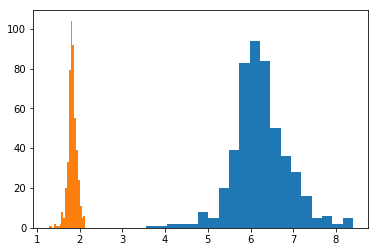

In [23]:
#plot 'RM'
plt.hist(data.RM, bins = 20)

#plot the log function
plt.hist(np.log(data.RM), bins = 20)

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** Intuitively I would think that the higher the number of rooms 'RM' there is in a house the higher the price gets, however, this might not be a straight forward relationship, because the size of the rooms also matters I presume, and the histogram representation of the data shows that the ideal number of rooms for the max price is about 6 Rooms. So if the house has 7 rooms but they're too tiny then that might also reduce the price. And the higher the percentage of lower class homeowners in the neighborhood 'LSTAT' the lower the price will get because that usually corrolates with lower education level and that could lead to a lower sense of global responsibility and this could lead to a lot of misbehaviour in some way or another, and this corrolates well with the histogram plot. Also, the higher the number of students to teachers 'PTRATIO', the lower the price will be, and this feature might be of a particular interest for the real estate costumers who have kids at school age. So the real estate agent could highlight this feature if they know the prospective buyer is a parent, and the histogram shows the most flectuation here. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [26]:
# TODO: Import 'r2_score'
from sklearn import metrics

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = metrics.r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [27]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}".format(score)

Model has a coefficient of determination, R^2, of 0.923


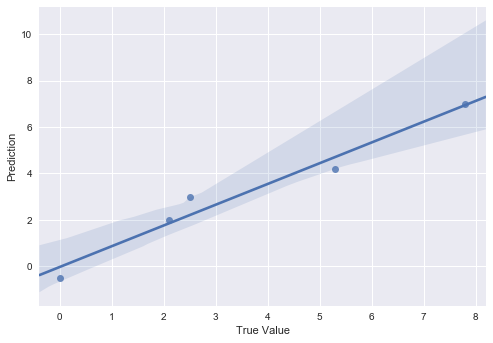

In [29]:
# Regression plot to show linear relationship between True value and Predition..

import seaborn as sns
sample_df = pd.DataFrame([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]).reset_index()
sample_df.columns = ['True Value', 'Prediction']
sns.regplot('True Value', 'Prediction', sample_df)

**Answer:** R^2 = 0.923 which means that 92.3% of the variables are accounted for for the performance of this model and only 7.7% has not been accounted for. In other words, since the total number of variables we have is 5, the model has accounted for 4.614999999999999 and only left out only ~ 0.38 variables. Which overall means that the model performed very well given this tiny size of data, and the model is expected to perform better as the number of the data increase. Source: "https://en.wikipedia.org/wiki/Coefficient_of_determination"
Regression plot above shows an optiomal linear model between the True value and Prediction. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [30]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=42, test_size=0.20, train_size=0.80)

print X_train
print X_test
print y_train
print y_test


# Success
print "Training and testing split was successful."

        RM  LSTAT  PTRATIO
325  5.869   9.80     20.2
140  6.174  24.16     21.2
433  6.749  17.44     20.2
416  6.436  16.22     20.2
487  6.794   6.48     21.0
25   5.599  16.51     21.0
459  6.484  18.68     20.2
137  6.454  14.59     21.2
454  6.229  12.87     20.2
349  6.398   7.79     20.2
42   6.169   5.81     17.9
208  6.182   9.47     18.6
237  5.605  18.46     19.1
274  6.453   8.23     15.3
249  7.333   7.79     13.0
467  5.871  13.34     20.2
355  3.863  13.33     20.2
410  6.202  14.52     20.2
245  8.259   3.54     19.1
440  5.936  16.94     20.2
22   6.142  18.72     21.0
321  6.031   7.83     16.9
46   5.786  14.15     17.9
31   6.072  13.04     21.0
113  6.092  17.09     17.8
370  5.000  31.99     20.2
299  4.973  12.64     18.4
192  7.274   6.62     12.6
132  6.372  11.12     21.2
57   6.816   3.95     15.1
..     ...    ...      ...
276  6.209   7.14     16.6
443  6.701  16.42     20.2
191  7.107   8.61     12.6
385  6.404  20.31     20.2
293  7.236   6.93     18.4
4

### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Splitting the data into training and testing subsets give us an indication of our model performance. So, the training data is used to train the learning algorithm to "see" the pattern between the different data points and their labels. Then the test data (which is conventionally 20% of the total dataset we have) is used to test our model and show us how well it did learning from the training data we gave it. Then we decide if our model is reliable enough to use for future data or whether it needs more data to learn better. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

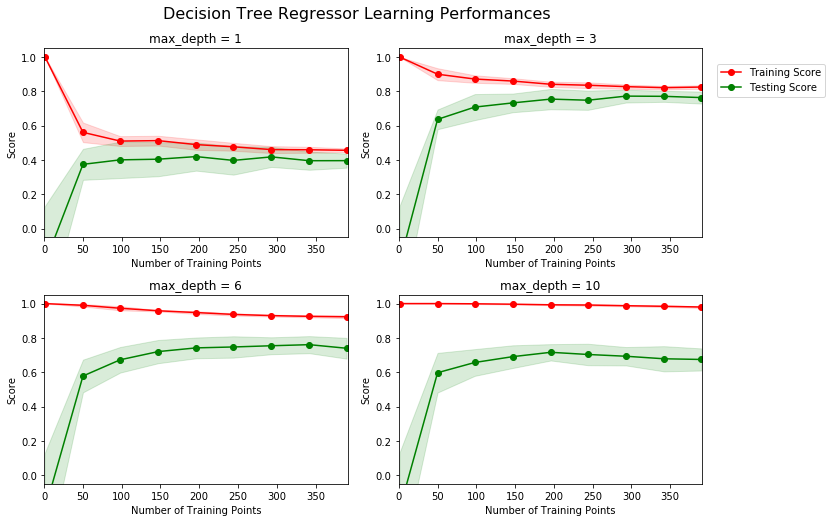

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** The graphs show that when the maximum depth of the tree is set to 10, the decision tree learns from fine details "noise" of the training data. This is called "overfitting". That resulted in a bad performance on the testing data and that is shown in the low score for the testing set in comparison to the score made from the training set, and increasing the number of training set will most likely not benefit the model and it will not generalize well for an unseen world. On the other hand, a very low maximum depth set at 1 is not the best either, because the model is overly general and misses on fitting to a lot of points in the training data, this shows a very low score result for the training and testing sets, and increasing the number of training data will not benefit here either. Even though the lines converge well, the scores for both were very low in comparison to the other parameters, and the model here is said to be "underfitting" or biased to the training set. 

Given the parameters here for four different max_depth; it seems that the model which used max_dept=3 would give the best generalization for an unseen world, since the training and testing sets converge well and have a high score for their performance, and increasing the number of training data here wouldn't be neccessary or beneficial for this model, because after 300 training points the testing curve has started to diverge from its optimal score, which indicates that adding more data wouldn't be beneficial here. Given only four parameters to choose for the model, I would go with max_depth=3 as the best parameter to use. Max_depth=6 is pretty good score wise and very close to max_depth=3, but since the training and testing sets don't converge well, and also increasing the number of training data would most likely not imporve the performanc. 



Source: http://scikit-learn.org/stable/modules/learning_curve.html 
(http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

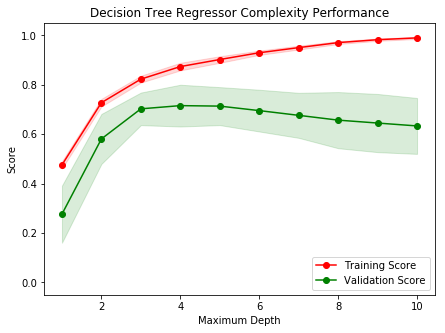

In [17]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** 
This graph here shows the same trends in our model set in different max_depth. At max_depth=1 the model suffers from a high bias and that is shown in the lowest score present in this graph. And at max_depth=10 it suffers from a high variance and that is shown in the big difference in score values between training and testing (validating) sets; this difference proofs that the model was overfitting to the training data and didn't generalize well for the testing set.

Please also refer to my answer for Question4.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** As I said in my answer for Question 4, it's a judgment call for each case. But generally, from the graphs we have, max_depth=3 and max_depth=6 are both good. It really depends on whether this situation can tolarate a slightly higher variance or a slightly higher bias. Like for example: max_depth=3 would give a better estimation of future data if it's within the range of trained data, however, I'll do poorly of future data if it varies a lot from trained data, and the prediction will be way off. And vice versa for max_depth=6. So max_depth=5 or max_depth=4 would be optimal in this situation. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** GridSearch means that we try to search the data with the best performance model given that each model has different sets of parameters. This method is also called “parameter sweep”, and as the name suggests, it exhausts all the parameters when searching for the best performance model, then these models are evaluated typically by Cross Validation. The exhaustive nature of this method counts as a disadvantage since this way of searching is very slow. And of course if the dataset has a massive number of data points, this method becomes very impractical. However, it is commonly used to define the best set of parameters. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** k-fold-CV is partitioning the data into k-fold sections where like 80% of the data is used for training and 20% of it for testing just like a normal way of training and testing, except that with k-fold CV, this is done for different parts of the data each time. So if we have 200 data points we could partition the data into 10 pins, each pin with 20 data points, and each time we use a different pin for testing across the remaining of the data. This way, maximizes our used of data for training as well as for testing, then we need to get the average from all the testing results to evaluate the performance of our model. 
However, this is one way of using CV, but it is biased and gives an optimistic minimum average error, as we used the testing pin to train the model at some point, which isn't a good representation of unseen world. A better say of performing CV is having about 20% of the data untouched and only used for evaluating model performance. The remaining of the data should be sectioned into k folds for training. This training section is then used with different models. Each model then tested on the unseen test section and we get the error rate for that model. We perform the same procesure on each model method then we get the average error rate to determine the best model to use for future data. 


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [31]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 42)
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [32]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** It actually compares very well, as GridSearch searches for the highest testing score on the different data splits. I expected it to be within the range of 3:6. And the Max_depth I got for the optimal model is 4 which is a pretty good balance of bias and variance. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [37]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
features.describe()

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


**Answer: ** 
The median for all the featurs here is a good meseare, so if we compare it for client2 with the lowest house price, we know that it is because it has schools with 3 students extra per teacher in comparison to the median. The media is (19:1). And 21% percent above the median for neighborhood poverty and even lower than the 1st quantile of the data for total number of rooms. 

Client1 has 5 total number of rooms, which is just below the 1st quantile, but this house makes it up with 4 students less per teacher for the nearby schools and also poverty is less by 6% in the neighborhood. 

Client3 compares well for all the features, as for total number of rooms, 8 is well above the average. And for porverty level it only has 3% which is 4% less than the 1st quantile. Furthermore, there're 7 students less for each teacher in the nearby schools than the median. 


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [21]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** Firstly, this model is not relevant to current time, and so it wouldn't be a good model at all, especially that the difference is about 40 years!! 1 year can make a big difference in a fast changing economy. Secondly, the featurs are not sufficient -and sometimes irrelavent- to describe a home, such as the number of rooms by itself is not an indicator for anything, especially if they're of a very small sizes! And some other features are missing -that home owners and sellers care about highlighting- like having: a front or a backyeard, a pool, a playgournd in the neighborhood..etc. Thirdly, the code for sensitivity shows that actually it isn't robust enough to reproduce consistant predictions and the range in predicted prices was high, hence, it's not a robust model. Lastly, this model is specific to Boston city in the year 1978, and so it is not fit to be used for other perdiction about other urban cities/rural city or even the same city in another point in time. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.